Midterm project - Kaggle exercise project https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Goals

1.Get familar with Kaggle competition since our final project may be a real Kaggle competition.[done] 2.Practice on large data set[yep] 3.Data quality checking, missing data imputation 4.Feature selection. What's your rationals to choose those features. 5.Create at least 5 new features and explain your reason for every new features. 6.Use feature importance to help you choose 10 features 7.Choose 3 ML algorithms we covered in the class to build your prediction models 8.For each model you build, you will need to evaluate and show your effort to improve it. 9.Your jupyter submission should be in an article quality. Do NOT print huge data set in the notebook. Use head(). Use plotting to visualize your analysis and results. Use markdown to write your comments. 10.Your score is based on completeness on every step. 11.Submit in HTML and ipynb format on canvas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
from sklearn import preprocessing
import sklearn.metrics as metrics
import math
from scipy.stats import norm, skew
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### we can notice train data has 81 columns (SalePrice ) present in it and test has only 80 columns in order train the models they should be same order, here the id might create a confusion and we dont certainly need it so dropping and dividing the data

In [7]:
h_train = train.drop(['Id'],axis=1)
h_test = test.drop(['Id'],axis=1)
h_target = h_train['SalePrice']
h_train = h_train.drop(['SalePrice'],axis=1)

In [8]:
h_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
h_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
h_target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

they are in same order so....

### Data cleaning and analysing 

In [11]:
h_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


so there are 36 numerical columns

#### examining numerical data

In [12]:
num_data = h_train.select_dtypes(include=[np.number])

num_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [13]:
len(num_data.columns)

36

In [14]:
num_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


#### Dealing with temporial data

In [15]:
year_feature = [feature for feature in num_data if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
for feature in year_feature:
    d = h_train[feature].unique()
    print(feature, d)

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

##### First lets compare temoral data with salesPrice
we will be getting the graphs for year sold dirrefence years from year built, 
remodelling and garage built sales price affected  

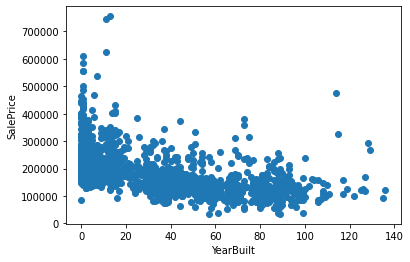

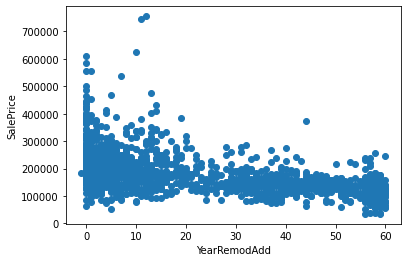

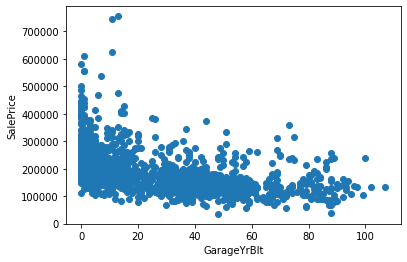

In [17]:
for feature in year_feature:
    if feature!='YrSold':
        data=train.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

##### Lets have a look at Discrete variables we have im considering atmost 25 count as discrete others considered as continuous

In [18]:
discrete_feature=[feature for feature in num_data if len(h_train[feature].unique())<25 and feature not in year_feature]
                  
discrete_feature 

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [19]:
train[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


##### Checking the relationship b/w the discrete ans SalesPrice

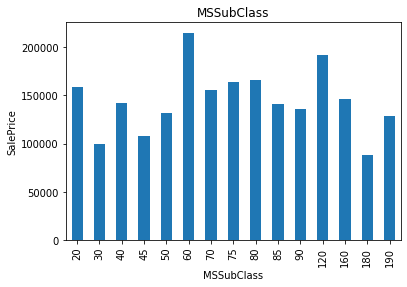

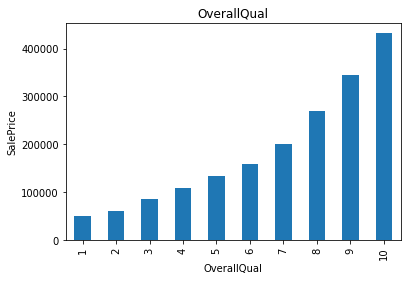

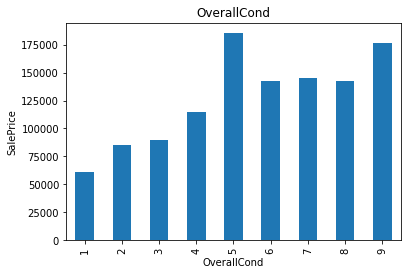

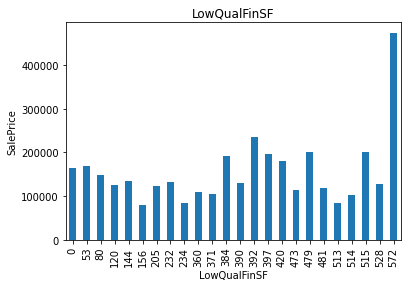

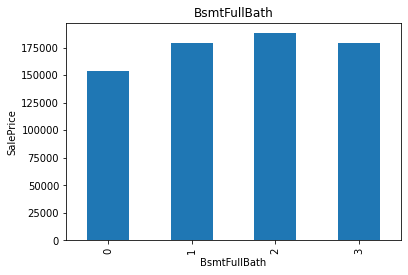

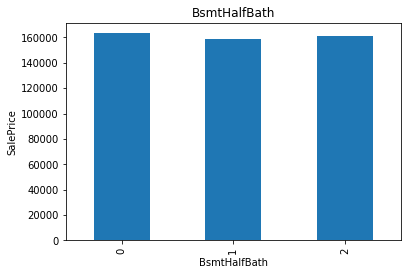

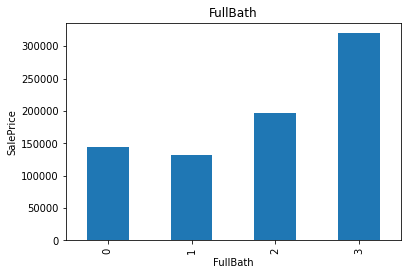

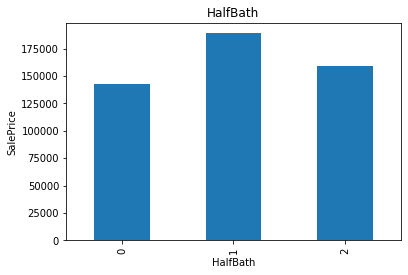

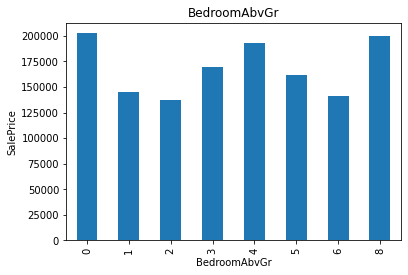

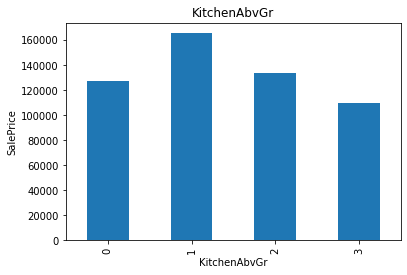

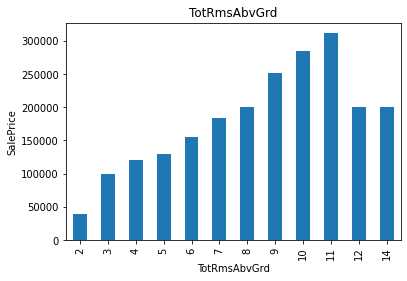

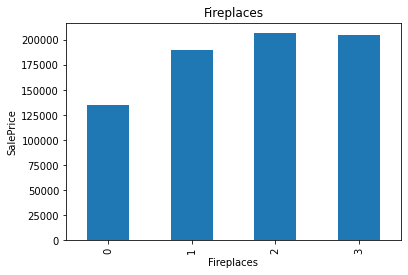

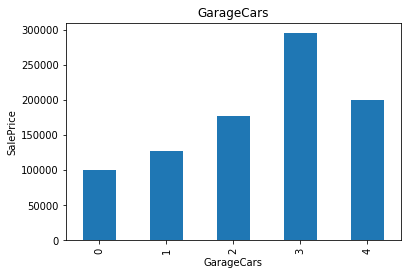

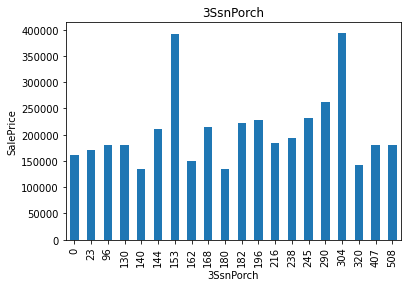

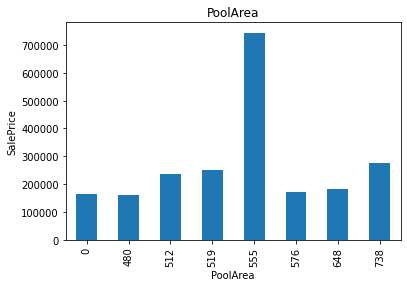

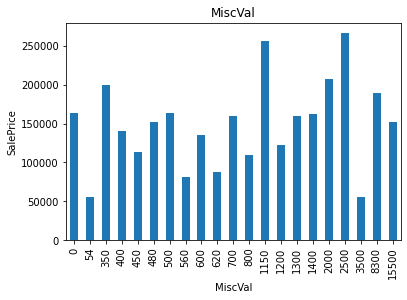

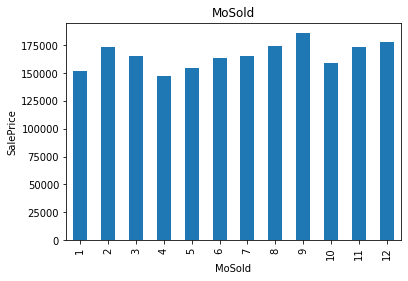

In [20]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [21]:
# Continuous Variables
continuous_feature=[feature for feature in num_data if feature not in discrete_feature+year_feature]

continuous_feature


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

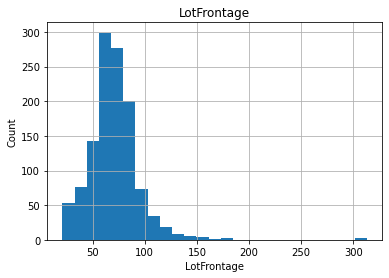

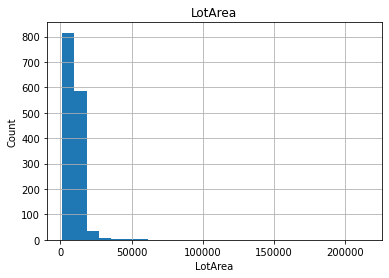

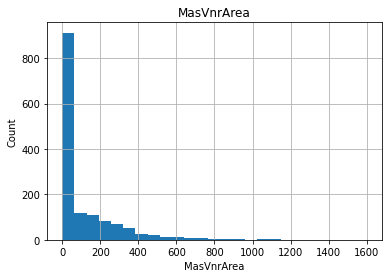

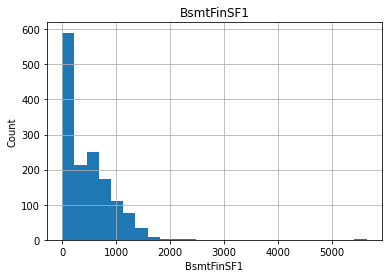

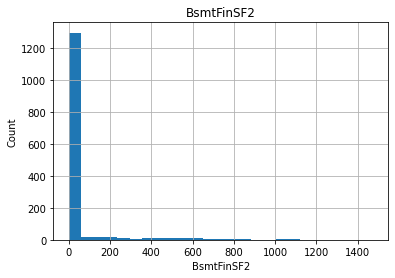

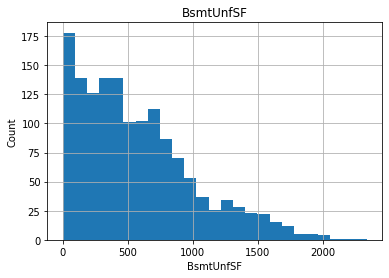

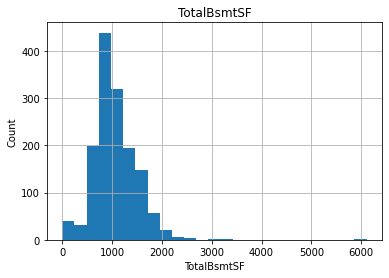

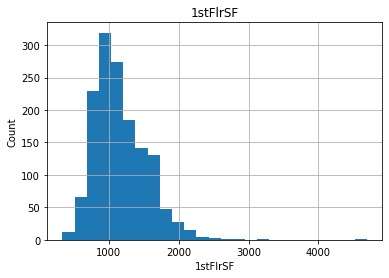

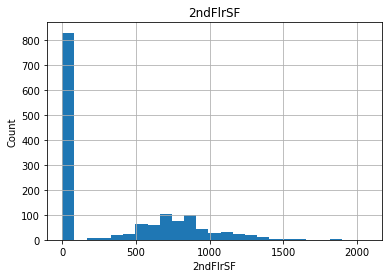

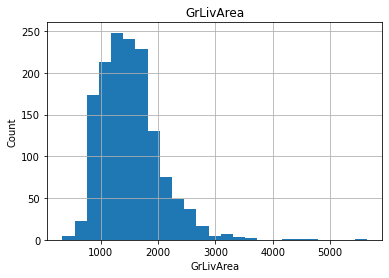

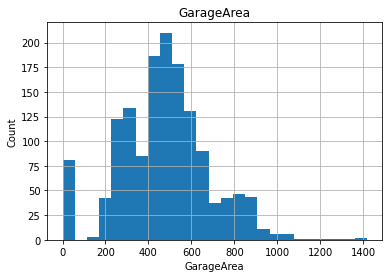

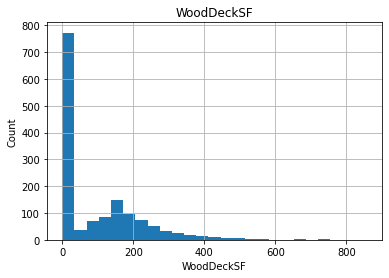

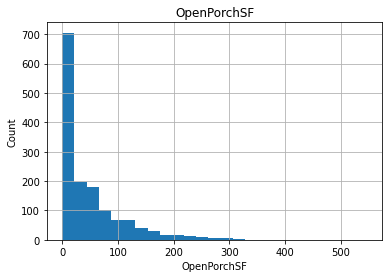

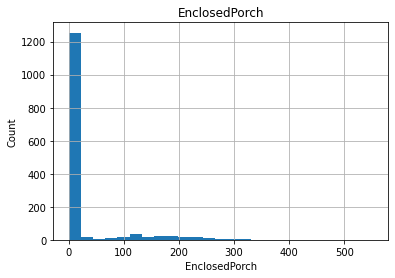

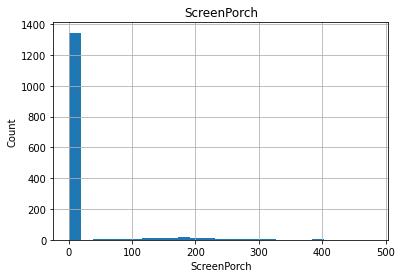

In [22]:
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [23]:
# Categorical Data

categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### checking the missing values

<AxesSubplot:>

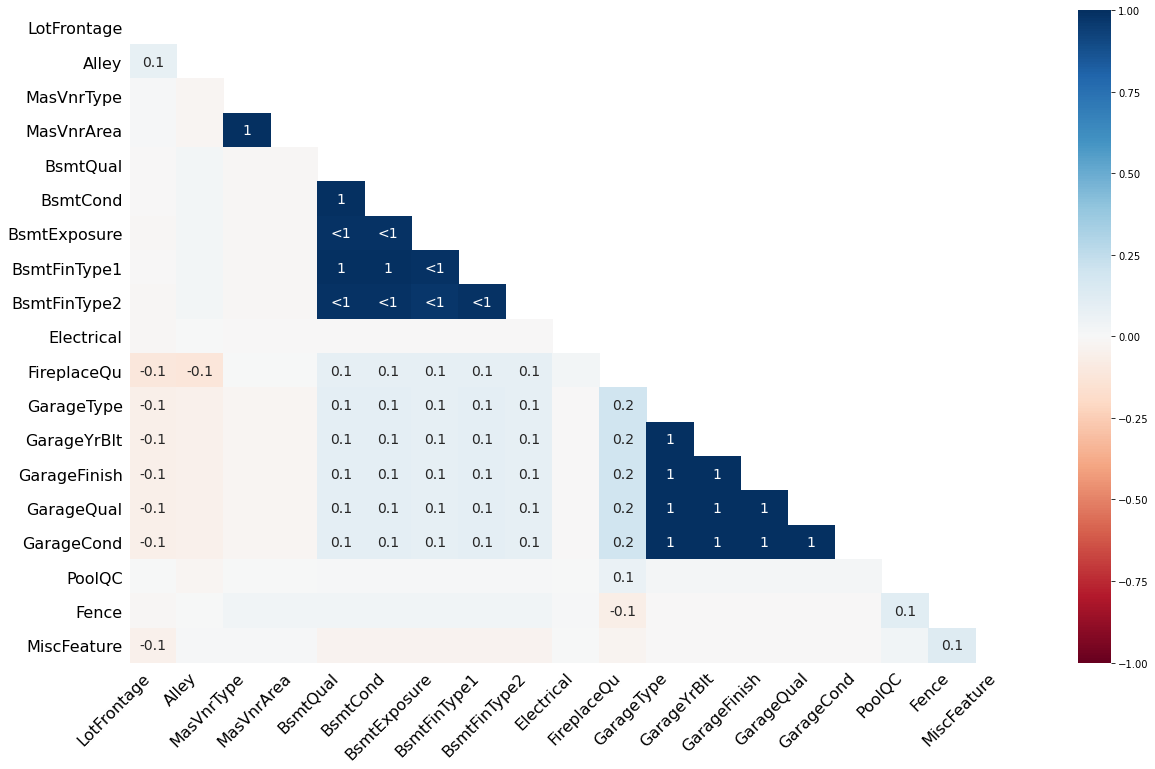

In [24]:
msno.heatmap(train)

#### Handling Missing values

In [25]:
train.skew(), train.kurt()

(Id                0.000000
 MSSubClass        1.407657
 LotFrontage       2.163569
 LotArea          12.207688
 OverallQual       0.216944
 OverallCond       0.693067
 YearBuilt        -0.613461
 YearRemodAdd     -0.503562
 MasVnrArea        2.669084
 BsmtFinSF1        1.685503
 BsmtFinSF2        4.255261
 BsmtUnfSF         0.920268
 TotalBsmtSF       1.524255
 1stFlrSF          1.376757
 2ndFlrSF          0.813030
 LowQualFinSF      9.011341
 GrLivArea         1.366560
 BsmtFullBath      0.596067
 BsmtHalfBath      4.103403
 FullBath          0.036562
 HalfBath          0.675897
 BedroomAbvGr      0.211790
 KitchenAbvGr      4.488397
 TotRmsAbvGrd      0.676341
 Fireplaces        0.649565
 GarageYrBlt      -0.649415
 GarageCars       -0.342549
 GarageArea        0.179981
 WoodDeckSF        1.541376
 OpenPorchSF       2.364342
 EnclosedPorch     3.089872
 3SsnPorch        10.304342
 ScreenPorch       4.122214
 PoolArea         14.828374
 MiscVal          24.476794
 MoSold            0

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

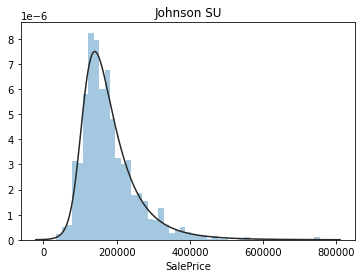

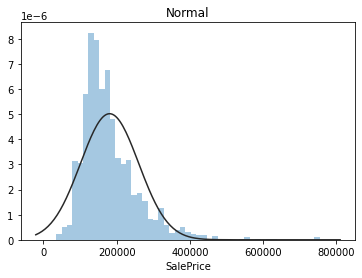

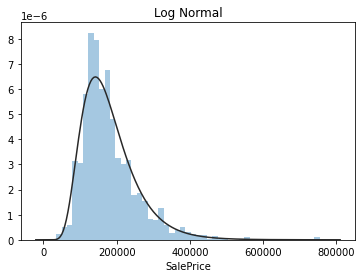

In [26]:
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

##### Its apparent from the above graphs normal distribution didnt do great job. looks jhonson su best fits

<AxesSubplot:xlabel='Skewness', ylabel='Density'>

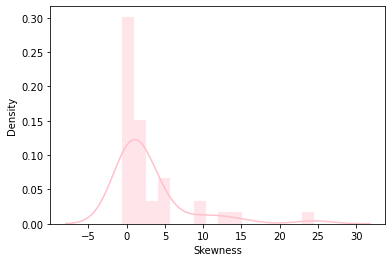

In [27]:
sns.distplot(train.skew(),color='pink',axlabel ='Skewness')

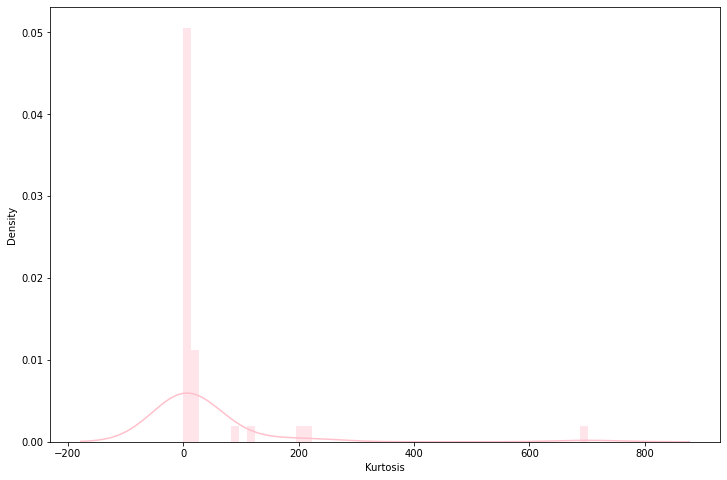

In [28]:
plt.figure(figsize = (12,8))
sns.distplot(train.kurt(),color='pink',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

#### Finding Correlation coefficients between numeric features and SalePrice

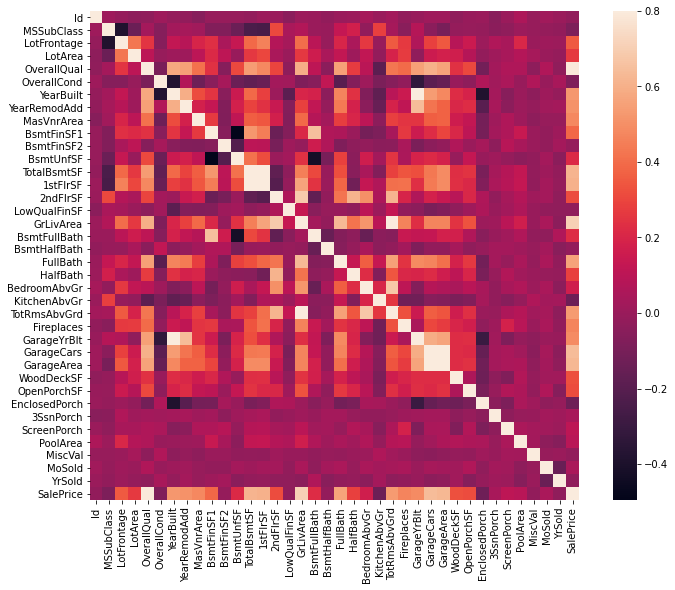

In [29]:
numeric_features = train.select_dtypes(include=[np.number])
correlation = numeric_features.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation, vmax=.8, square=True);


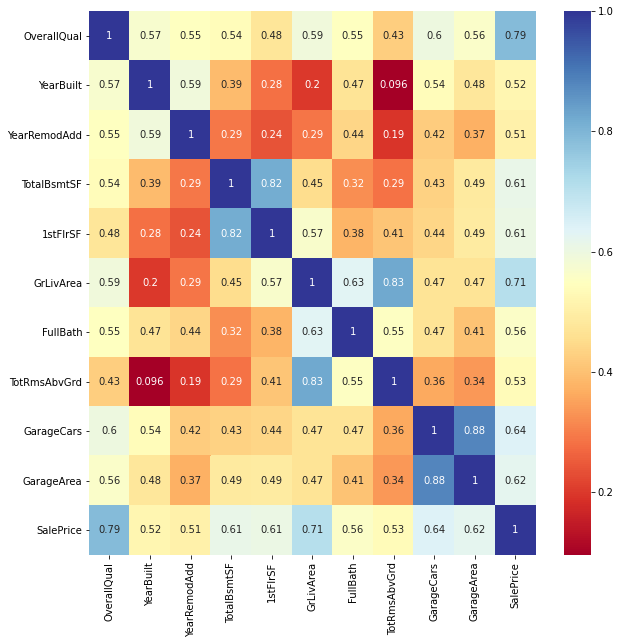

In [30]:
highest_corr_features = correlation.index[abs(correlation["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[highest_corr_features].corr(),annot=True,cmap="RdYlBu")

In [31]:
correlation["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

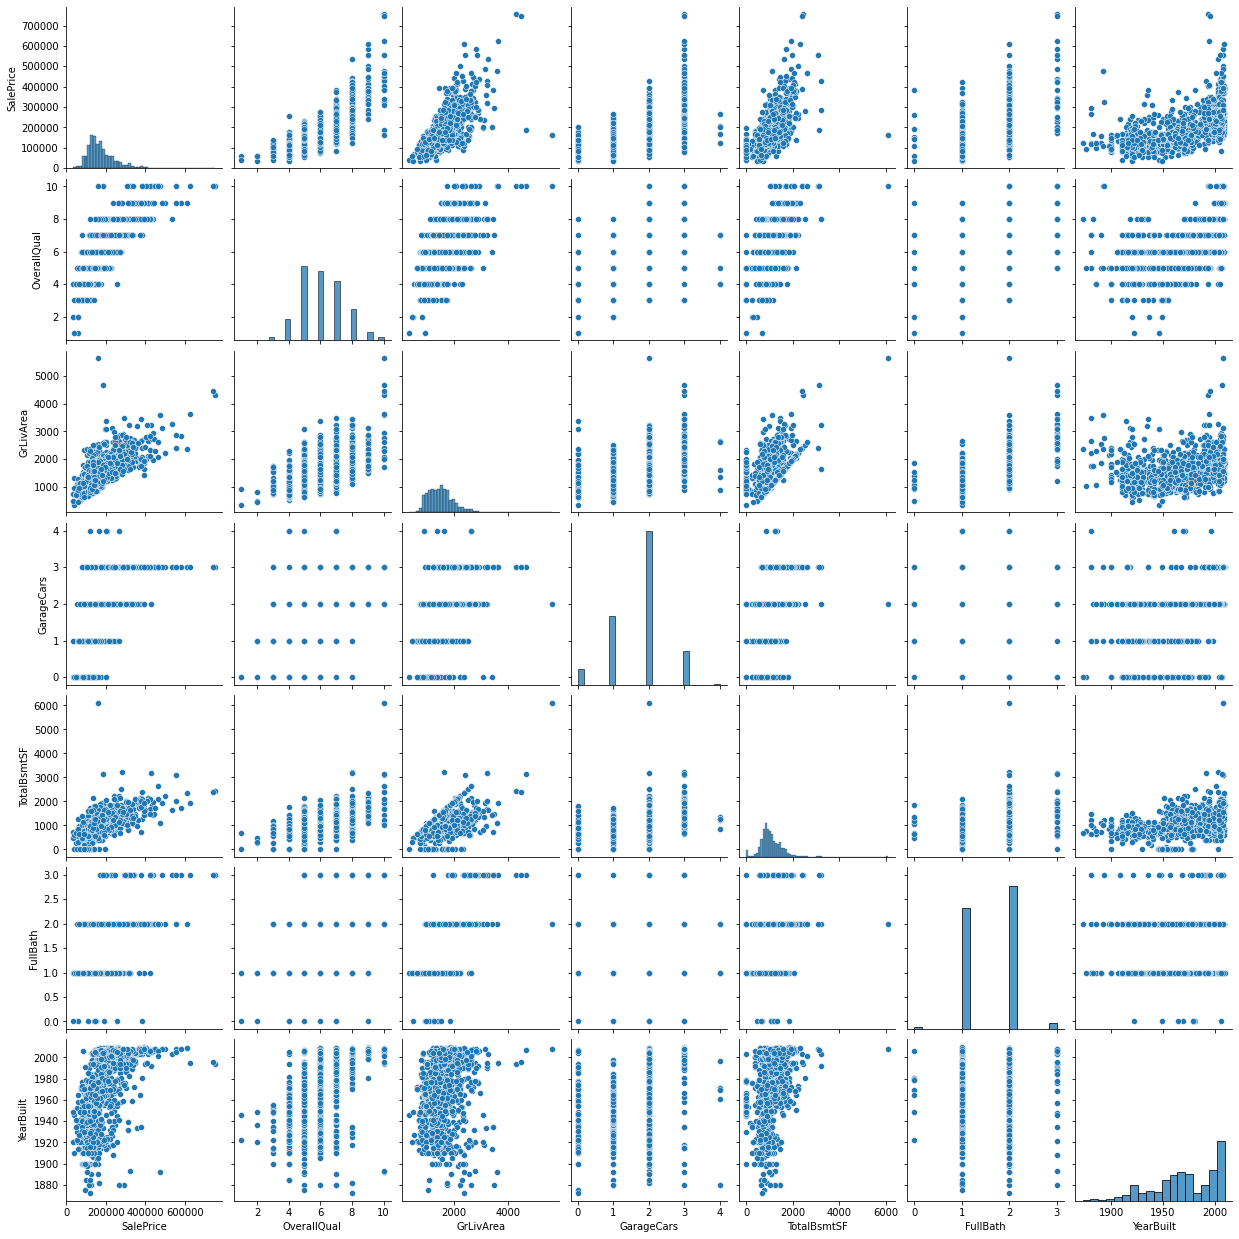

In [32]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

In [33]:
# Missing values percentage check
data = pd.read_csv('train.csv')
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature+'\t', np.round(data[feature].isnull().mean(), 4))

LotFrontage	 0.1774
Alley	 0.9377
MasVnrType	 0.0055
MasVnrArea	 0.0055
BsmtQual	 0.0253
BsmtCond	 0.0253
BsmtExposure	 0.026
BsmtFinType1	 0.0253
BsmtFinType2	 0.026
FireplaceQu	 0.4726
GarageType	 0.0555
GarageYrBlt	 0.0555
GarageFinish	 0.0555
GarageQual	 0.0555
GarageCond	 0.0555
PoolQC	 0.9952
Fence	 0.8075
MiscFeature	 0.963


In [34]:
total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = (numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtFinSF1,0,0.000000
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000
TotalBsmtSF,0,0.000000
BsmtUnfSF,0,0.000000


In [35]:
# Categorical Features missing values
total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = (categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [36]:
# too much missing values we will just drop those columns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


c_test  = test.copy()
c_train  = train.copy()

c_train['train']  = 1
c_test['train']  = 0
df = pd.concat([c_train, c_test], axis=0,sort=False)
# df = train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
# train.head(1)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1


In [37]:

df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [38]:
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

In [39]:
null_counts = object_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


In [40]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
for col in columns_None:
    object_columns_df.loc[object_columns_df[col].isna(),col]='None'
    object_columns_df[col].fillna('None')


In [41]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
for col in columns_with_lowNA:
    object_columns_df.loc[object_columns_df[col].isna(),col]=object_columns_df[col].mode()[0]
    
    object_columns_df[col] = object_columns_df[col].fillna(object_columns_df[col].mode())

    #object_columns_df.loc[object_columns_df[col].isna(),col]= 

    object_columns_df[col].fillna(object_columns_df.mode().iloc[0])

In [42]:
null_counts = object_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [43]:
# GarageYrBlt and LotFrontage with median fill
# rest with 0 fill 
print((numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt']).median())
print(numerical_columns_df["LotFrontage"].median())

35.0
68.0


In [44]:
numerical_columns_df['GarageYrBlt'] = numerical_columns_df['GarageYrBlt'].fillna(numerical_columns_df['YrSold']-35)
numerical_columns_df.loc[numerical_columns_df['GarageYrBlt'].isna(),'GarageYrBlt']=(numerical_columns_df['YrSold']-35)

numerical_columns_df['LotFrontage'] = numerical_columns_df['LotFrontage'].fillna(68)
numerical_columns_df.loc[numerical_columns_df['LotFrontage'].isna(),'LotFrontage']=68

In [45]:
numerical_columns_df= numerical_columns_df.fillna(0)

In [46]:
null_counts = numerical_columns_df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
train            0
dtype: int64


In [47]:
numerical_columns_df.var()

Id               7.102900e+05
MSSubClass       1.807749e+03
LotFrontage      4.544528e+02
LotArea          6.220471e+07
OverallQual      1.987951e+00
OverallCond      1.239060e+00
YearBuilt        9.175714e+02
YearRemodAdd     4.365736e+02
MasVnrArea       3.198896e+04
BsmtFinSF1       2.075768e+05
BsmtFinSF2       2.862157e+04
BsmtUnfSF        1.932401e+05
TotalBsmtSF      1.945873e+05
1stFlrSF         1.539480e+05
2ndFlrSF         1.837849e+05
LowQualFinSF     2.152665e+03
GrLivArea        2.560877e+05
BsmtFullBath     2.752853e-01
BsmtHalfBath     6.032327e-02
FullBath         3.057750e-01
HalfBath         2.528798e-01
BedroomAbvGr     6.768239e-01
KitchenAbvGr     4.599395e-02
TotRmsAbvGrd     2.462951e+00
Fireplaces       4.174831e-01
GarageYrBlt      6.199309e+02
GarageCars       5.809420e-01
GarageArea       4.645563e+04
WoodDeckSF       1.600898e+04
OpenPorchSF      4.566447e+03
EnclosedPorch    4.127323e+03
3SsnPorch        6.344439e+02
ScreenPorch      3.156683e+03
PoolArea  

In [48]:
object_columns_df.var()

Series([], dtype: float64)

In [49]:
numerical_columns_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train
Id,1.000000,0.008931,-0.024710,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.026737,-0.017203,...,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.739838,-0.866025
MSSubClass,0.008931,1.000000,-0.389469,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064002,...,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.036083,-0.005658
LotFrontage,-0.024710,-0.389469,1.000000,0.361426,0.204215,-0.068118,0.115498,0.086049,0.200474,0.201276,...,0.151789,0.011039,0.024882,0.069352,0.161025,0.035161,0.010695,-0.007562,0.152834,0.028062
LotArea,-0.040746,-0.201730,0.361426,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194168,...,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.162122,0.044237
OverallQual,-0.029771,0.033638,0.204215,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.282150,...,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.295558,0.007269
OverallCond,-0.002839,-0.065625,-0.068118,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050823,...,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.020809,0.009676
YearBuilt,-0.016581,0.034409,0.115498,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279780,...,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.193199,-0.001485
YearRemodAdd,-0.050438,0.043315,0.086049,0.021612,0.571532,0.047654,0.612235,1.000000,0.191668,0.152576,...,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.211347,0.028792
MasVnrArea,-0.026737,0.006309,0.200474,0.124728,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301537,...,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,-0.002216,-0.017654,0.186306,0.009628
BsmtFinSF1,-0.017203,-0.064002,0.201276,0.194168,0.282150,-0.050823,0.279780,0.152576,0.301537,1.000000,...,0.124366,-0.099575,0.050934,0.096901,0.084470,0.093310,-0.000671,0.022500,0.148701,0.005200


AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

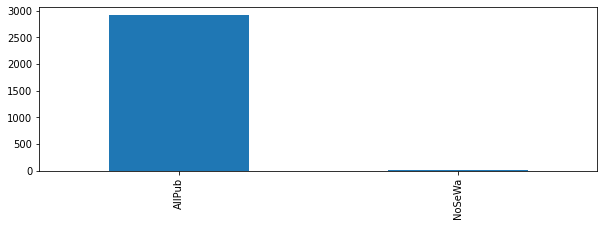

In [50]:
object_columns_df['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Utilities'].value_counts() 

Pave    2907
Grvl      12
Name: Street, dtype: int64

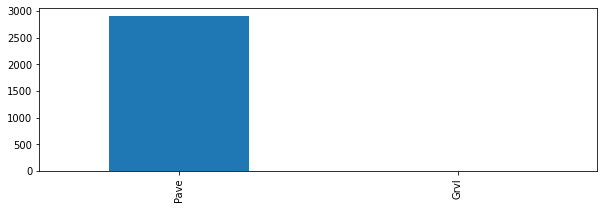

In [51]:
object_columns_df['Street'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Street'].value_counts() 

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

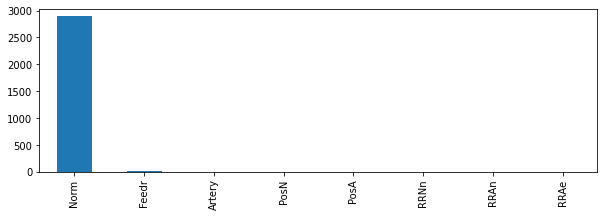

In [52]:
object_columns_df['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Condition2'].value_counts() 

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
ClyTile       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

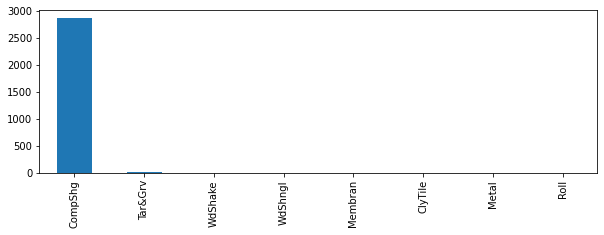

In [53]:
object_columns_df['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['RoofMatl'].value_counts() 

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

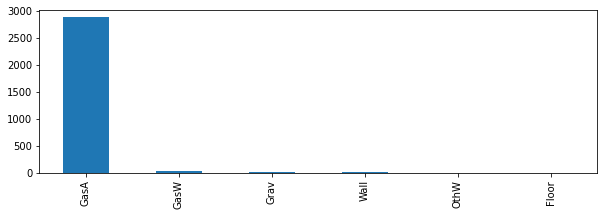

In [54]:
object_columns_df['Heating'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Heating'].value_counts()

In [55]:
# we will just get rid of object columns where it has very low variance
object_columns_df = object_columns_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

### Adding new features

In [56]:
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [57]:
# the data has flaw the min house age cant be -1 so we will replace with proper year here

numerical_columns_df.loc[numerical_columns_df['YrSold'] < numerical_columns_df['YearBuilt'],'YrSold' ] = 2009
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_House, dtype: float64

In [58]:
numerical_columns_df['remodel_speed']= (numerical_columns_df['YearRemodAdd']-numerical_columns_df['YearBuilt'])
numerical_columns_df['remodel_speed'].describe()

count    2919.000000
mean       12.951696
std        24.065624
min        -1.000000
25%         0.000000
50%         0.000000
75%        18.000000
max       127.000000
Name: remodel_speed, dtype: float64

In [59]:
Negatif = numerical_columns_df[numerical_columns_df['remodel_speed'] < 0]
Negatif

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Age_House,remodel_speed
416,1877,20,65.0,10739,7,5,2002,2001,68.0,1259.0,...,0,0,0,0,4,2009,0.0,0,7,-1


In [60]:
numerical_columns_df.loc[numerical_columns_df['YearRemodAdd'] < numerical_columns_df['YearBuilt'],'YearRemodAdd' ] = 2002
numerical_columns_df['remodel_speed']= (numerical_columns_df['YearRemodAdd']-numerical_columns_df['YearBuilt'])
numerical_columns_df['remodel_speed'].describe()

count    2919.000000
mean       12.952038
std        24.065433
min         0.000000
25%         0.000000
50%         0.000000
75%        18.000000
max       127.000000
Name: remodel_speed, dtype: float64

In [61]:
numerical_columns_df['TotalBsmtBath'] = numerical_columns_df['BsmtFullBath'] + numerical_columns_df['BsmtFullBath']*0.5
numerical_columns_df['TotalBath'] = numerical_columns_df['FullBath'] + numerical_columns_df['HalfBath']*0.5 
numerical_columns_df['TotalSA']=numerical_columns_df['TotalBsmtSF'] + numerical_columns_df['1stFlrSF'] + numerical_columns_df['2ndFlrSF']
numerical_columns_df["TotalPorchSF"] = numerical_columns_df["WoodDeckSF"] + numerical_columns_df["OpenPorchSF"] + numerical_columns_df["EnclosedPorch"] + numerical_columns_df["3SsnPorch"] + numerical_columns_df["ScreenPorch"] 

In [62]:
numerical_columns_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MoSold,YrSold,SalePrice,train,Age_House,remodel_speed,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,2,2008,208500.0,1,5,0,1.5,2.5,2566.0,61
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,5,2007,181500.0,1,31,0,0.0,2.0,2524.0,298
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,9,2008,223500.0,1,7,1,1.5,2.5,2706.0,42
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,2,2006,140000.0,1,91,55,1.5,1.0,2473.0,307
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,12,2008,250000.0,1,8,0,1.5,2.5,3343.0,276


In [63]:
# Mapping the categorical values to integers
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_df['ExterQual'] = object_columns_df['ExterQual'].map(bin_map)
object_columns_df['ExterCond'] = object_columns_df['ExterCond'].map(bin_map)
object_columns_df['BsmtCond'] = object_columns_df['BsmtCond'].map(bin_map)
object_columns_df['BsmtQual'] = object_columns_df['BsmtQual'].map(bin_map)
object_columns_df['HeatingQC'] = object_columns_df['HeatingQC'].map(bin_map)
object_columns_df['KitchenQual'] = object_columns_df['KitchenQual'].map(bin_map)
object_columns_df['FireplaceQu'] = object_columns_df['FireplaceQu'].map(bin_map)
object_columns_df['GarageQual'] = object_columns_df['GarageQual'].map(bin_map)
object_columns_df['GarageCond'] = object_columns_df['GarageCond'].map(bin_map)
object_columns_df['CentralAir'] = object_columns_df['CentralAir'].map(bin_map)
object_columns_df['LotShape'] = object_columns_df['LotShape'].map(bin_map)
object_columns_df['BsmtExposure'] = object_columns_df['BsmtExposure'].map(bin_map)
object_columns_df['BsmtFinType1'] = object_columns_df['BsmtFinType1'].map(bin_map)
object_columns_df['BsmtFinType2'] = object_columns_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_df['PavedDrive'] = object_columns_df['PavedDrive'].map(PavedDrive)

In [64]:
rest_object_columns = object_columns_df.select_dtypes(include=['object'])
#Using One hot encoder
object_columns_df = pd.get_dummies(object_columns_df, columns=rest_object_columns.columns)

In [65]:
object_columns_df.head()


,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,1,0,0,0,0,1,0
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0
3,2,2,2,2,4,2,5,1,4,1,...,0,0,0,1,1,0,0,0,0,0
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,1,0,0,0,0,1,0


In [66]:
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,MoSold,YrSold,SalePrice,train,Age_House,remodel_speed,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF
0,3,4,2,4,2,2,6,1,4,1,...,2,2008,208500.0,1,5,0,1.5,2.5,2566.0,61
1,3,2,2,4,2,4,5,1,4,1,...,5,2007,181500.0,1,31,0,0.0,2.0,2524.0,298
2,2,4,2,4,2,2,6,1,4,1,...,9,2008,223500.0,1,7,1,1.5,2.5,2706.0,42
3,2,2,2,2,4,2,5,1,4,1,...,2,2006,140000.0,1,91,55,1.5,1.0,2473.0,307
4,2,4,2,4,2,3,6,1,4,1,...,12,2008,250000.0,1,8,0,1.5,2.5,3343.0,276


In [67]:
df_final = df_final.drop(['Id',],axis=1)

df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['SalePrice'],axis=1)
df_test = df_test.drop(['train',],axis=1)

In [68]:
target= df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis=1)

In [69]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.25,random_state=0)

### Applying ML models

## considering whole data

#### Logistic regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
clf = LogisticRegression(solver="liblinear").fit(x_train, y_train)

In [72]:
predict = clf.predict(x_test)

In [73]:
import math
import sklearn.metrics as metrics
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict))))

Root Mean Square Error test = 61636.50672443873


In [74]:
clf.fit(df_train, target)

LogisticRegression(solver='liblinear')

In [75]:
predicty = clf.predict(df_test)

In [76]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": predicty
    })
submission.to_csv('submission_logreg.csv', index=False)

In [77]:
submission.head()

,Id,SalePrice
0,1461,129000.0
1,1462,128950.0
2,1463,175000.0
3,1464,215000.0
4,1465,190000.0


#### Decision Tree Regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
regressor_predict = regressor.predict(x_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, regressor_predict))))
regressor.fit(df_train, target)
regressor_predicty = regressor.predict(df_test)

Root Mean Square Error test = 34061.0151185209


In [79]:
submission_reg = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": regressor_predicty
    })
submission_reg.to_csv('submission_decisiontree.csv', index=False)

In [80]:
submission_reg.head()

,Id,SalePrice
0,1461,112500.0
1,1462,181900.0
2,1463,192000.0
3,1464,197500.0
4,1465,197000.0


#### KNN Regressor

In [81]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 51085.267261679866
RMSE value for k=  2 is: 46092.216339690094
RMSE value for k=  3 is: 44707.16501134464
RMSE value for k=  4 is: 43437.57562715009
RMSE value for k=  5 is: 44815.02239993327
RMSE value for k=  6 is: 45074.35040046412
RMSE value for k=  7 is: 45825.616673206656
RMSE value for k=  8 is: 45752.7096808777
RMSE value for k=  9 is: 45353.87339037051
RMSE value for k=  10 is: 45211.696558757045
RMSE value for k=  11 is: 45195.56765258812
RMSE value for k=  12 is: 45536.28802688184
RMSE value for k=  13 is: 46175.78288954571
RMSE value for k=  14 is: 46017.67980729154
RMSE value for k=  15 is: 46204.02955065087
RMSE value for k=  16 is: 45967.88478721079
RMSE value for k=  17 is: 46149.13522622845
RMSE value for k=  18 is: 46213.08650447539
RMSE value for k=  19 is: 46375.63352865064
RMSE value for k=  20 is: 46598.0926983847


In [83]:
model.fit(df_train, target)  #fit the model
pred=model.predict(df_test) #make prediction on test set
    

In [84]:
submission_reg = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": pred
    })
submission_reg.to_csv('submission_knn.csv', index=False)

In [85]:
submission_reg.head()

,Id,SalePrice
0,1461,133027.50
1,1462,179185.00
2,1463,187265.00
3,1464,192127.50
4,1465,169392.75


#### Trying Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr = RandomForestRegressor(random_state=1, max_depth=10)
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [88]:
rfr_predict = rfr.predict(x_test)

In [89]:
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, rfr_predict))))

Root Mean Square Error test = 30438.946240070738


In [90]:
rfr.fit(df_train, target)

RandomForestRegressor(max_depth=10, random_state=1)

In [91]:
rfr_predicty = rfr.predict(df_test)

In [92]:
submission_rfr = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": rfr_predicty
    })
submission_rfr.to_csv('submission_randomforest.csv', index=False)

In [93]:
submission_rfr.head()

,Id,SalePrice
0,1461,127551.848324
1,1462,161529.494453
2,1463,182934.188281
3,1464,184524.360831
4,1465,193915.986526


#### comparing the algorithms

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
import scipy.stats as stats 
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
## Create an empty list
pipeline_models = []

# Assign all models into the list
seed = 42
models = [LogisticRegression(solver="liblinear"),
          RandomForestRegressor(random_state=seed),
          DecisionTreeRegressor(),
          KNeighborsRegressor(),
         ]

model_names = ["logreg","RFR","DT_Reg","KNN_Reg"]

## Assign each model to a pipeline
for name, model in zip(model_names,models):
    pipeline = ("Scaled_"+ name,
                Pipeline([("Scaler",StandardScaler()),
                          (name,model)
                         ]))
    pipeline_models.append(pipeline)

In [96]:
## Create a dataframe to store all the models' cross validation score
evaluate = pd.DataFrame(columns=["model","cv","std"])


## Encoded dataset
for name,model in pipeline_models:
    kfold = KFold(n_splits=4,shuffle=True,random_state=42)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, n_jobs=-1, scoring="r2")
    
    row = evaluate.shape[0]
    evaluate.loc[row,"model"] = name
    evaluate.loc[row,"cv"] = round(cv.mean(),3)
    evaluate.loc[row,"std"] = "+/- {}".format(round(cv.std(),4))
    
    evaluate = evaluate.sort_values("cv",ascending=False)

[Text(0, 0, 'Scaled_RFR'),
 Text(1, 0, 'Scaled_KNN_Reg'),
 Text(2, 0, 'Scaled_DT_Reg'),
 Text(3, 0, 'Scaled_logreg')]

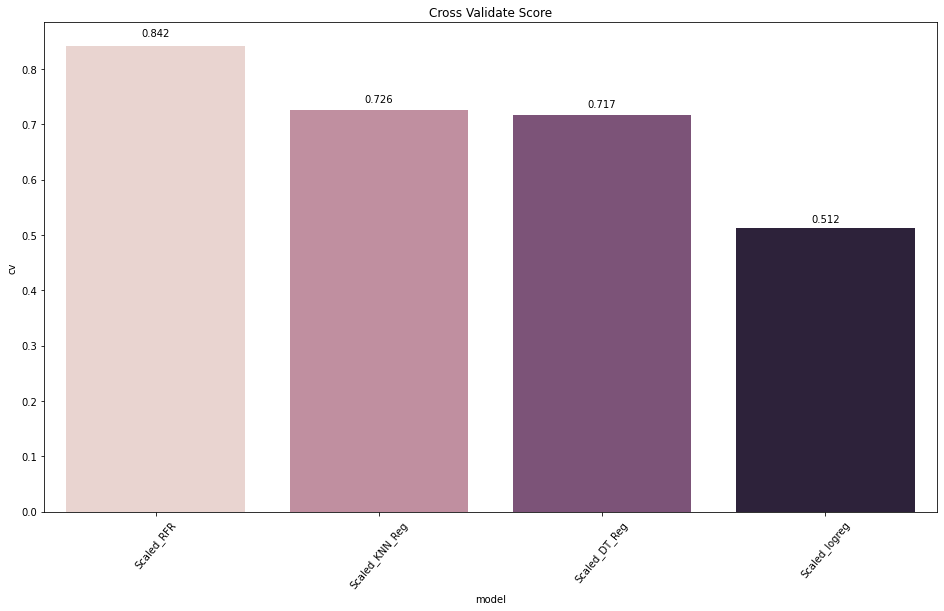

In [97]:
## Visualization
fig, ax = plt.subplots(1,1,sharey=False,figsize=(16,9))

## Encoded dataset
bar = sns.barplot(evaluate["model"], evaluate["cv"],ax=ax,palette = sns.cubehelix_palette(evaluate.shape[0]))
for rec in bar.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width()/2, height*1.02,height,ha="center")
ax.set_title("Cross Validate Score")
ax.set_xticklabels(evaluate["model"].to_list(),rotation =50)

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
final_model = GradientBoostingRegressor()
final_model = final_model.fit(x_train,y_train)

In [100]:
predict = final_model.predict(x_test)

In [101]:
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict))))

Root Mean Square Error test = 26923.52500642029


In [102]:
final_model.fit(df_train, target)

GradientBoostingRegressor()

In [103]:
predicty = final_model.predict(df_test)

In [104]:
submission_rfr = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": rfr_predicty
    })
submission_rfr.to_csv('submission_gbr.csv', index=False)

In [105]:
submission_rfr.head()

,Id,SalePrice
0,1461,127551.848324
1,1462,161529.494453
2,1463,182934.188281
3,1464,184524.360831
4,1465,193915.986526


### selecting 10 features 

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101   this have highest correlation with salesprice

In [106]:
df_train.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,PoolArea,MiscVal,MoSold,YrSold,Age_House,remodel_speed,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF
0,3,4,2,4,2,2,6,1,4,1,...,0,0,2,2008,5,0,1.5,2.5,2566.0,61
1,3,2,2,4,2,4,5,1,4,1,...,0,0,5,2007,31,0,0.0,2.0,2524.0,298
2,2,4,2,4,2,2,6,1,4,1,...,0,0,9,2008,7,1,1.5,2.5,2706.0,42
3,2,2,2,2,4,2,5,1,4,1,...,0,0,2,2006,91,55,1.5,1.0,2473.0,307
4,2,4,2,4,2,3,6,1,4,1,...,0,0,12,2008,8,0,1.5,2.5,3343.0,276


In [107]:
df_test.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,PoolArea,MiscVal,MoSold,YrSold,Age_House,remodel_speed,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF
0,3,2,2,2,2,2,3,2,2,1,...,0,0,6,2010,49,0,0.0,1.0,1778.0,260
1,2,2,2,2,2,2,5,1,2,1,...,0,12500,6,2010,52,0,0.0,1.5,2658.0,429
2,2,2,2,4,2,2,6,1,4,1,...,0,0,3,2010,13,1,0.0,2.5,2557.0,246
3,2,2,2,2,2,2,6,1,4,1,...,0,0,6,2010,12,0,0.0,2.5,2530.0,396
4,2,4,2,4,2,2,5,1,4,1,...,0,0,1,2010,18,0,0.0,2.0,2560.0,226


In [173]:
selected_train=df_train[[
"OverallQual","GrLivArea",
"GarageCars",
"GarageArea",
"TotalBsmtSF",
"remodel_speed",
"TotalBsmtBath",
"TotalBath", 
"TotalSA",
"TotalPorchSF"  ]]
selected_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,remodel_speed,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF
0,7,1710,2.0,548.0,856.0,0,1.5,2.5,2566.0,61
1,6,1262,2.0,460.0,1262.0,0,0.0,2.0,2524.0,298
2,7,1786,2.0,608.0,920.0,1,1.5,2.5,2706.0,42
3,7,1717,3.0,642.0,756.0,55,1.5,1.0,2473.0,307
4,8,2198,3.0,836.0,1145.0,0,1.5,2.5,3343.0,276


In [174]:
selected_test=df_test[[ "OverallQual","GrLivArea",
"GarageCars",
"GarageArea",
"TotalBsmtSF",
"remodel_speed",
"TotalBsmtBath",
"TotalBath", 
"TotalSA",
"TotalPorchSF"  ]]
selected_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,remodel_speed,TotalBsmtBath,TotalBath,TotalSA,TotalPorchSF
0,5,896,1.0,730.0,882.0,0,0.0,1.0,1778.0,260
1,6,1329,1.0,312.0,1329.0,0,0.0,1.5,2658.0,429
2,5,1629,2.0,482.0,928.0,1,0.0,2.5,2557.0,246
3,6,1604,2.0,470.0,926.0,0,0.0,2.5,2530.0,396
4,8,1280,2.0,506.0,1280.0,0,0.0,2.0,2560.0,226


In [175]:
a_train,a_test,b_train,b_test = train_test_split(selected_train,target,test_size=0.25,random_state=0)

### logistic regression

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
clf = LogisticRegression(solver="liblinear").fit(a_train, b_train)

In [177]:
predict = clf.predict(a_test)

In [178]:
import math
import sklearn.metrics as metrics
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(b_test, predict))))

Root Mean Square Error test = 78291.95458856951


In [179]:
clf.fit(selected_train, target)

LogisticRegression(solver='liblinear')

In [180]:
predicty = clf.predict(selected_test)

In [181]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": predicty
    })

In [182]:
submission.head()

,Id,SalePrice
0,1461,143250.0
1,1462,157900.0
2,1463,190000.0
3,1464,185000.0
4,1465,180000.0


### decision tree regressor

In [183]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(a_train,b_train)
regressor_predict = regressor.predict(a_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(b_test, regressor_predict))))
regressor.fit(selected_train, target)
regressor_predicty = regressor.predict(selected_test)

Root Mean Square Error test = 44079.43216052721


In [184]:
submission_reg = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": regressor_predicty
    })
submission_reg.head()

,Id,SalePrice
0,1461,62383.0
1,1462,158000.0
2,1463,180000.0
3,1464,187000.0
4,1465,254000.0


### KNN regressor

In [185]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(a_train, b_train)  #fit the model
    pred=model.predict(a_test) #make prediction on test set
    error = sqrt(mean_squared_error(b_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 46276.344993930325
RMSE value for k=  2 is: 48559.39927765632
RMSE value for k=  3 is: 45721.16516585718
RMSE value for k=  4 is: 45062.91414244364
RMSE value for k=  5 is: 44457.43059723353
RMSE value for k=  6 is: 44226.58366852585
RMSE value for k=  7 is: 43924.30541979979
RMSE value for k=  8 is: 43844.75374402882
RMSE value for k=  9 is: 43789.326423854276
RMSE value for k=  10 is: 44267.68743311815
RMSE value for k=  11 is: 44539.23309524333
RMSE value for k=  12 is: 44291.69584522422
RMSE value for k=  13 is: 44303.92583283867
RMSE value for k=  14 is: 44257.51986652073
RMSE value for k=  15 is: 44545.04248381595
RMSE value for k=  16 is: 44991.901199304826
RMSE value for k=  17 is: 44724.974375751066
RMSE value for k=  18 is: 44928.56713758552
RMSE value for k=  19 is: 44729.78210319201
RMSE value for k=  20 is: 44801.37517960132


In [187]:
model.fit(selected_train, target)  #fit the model
pred=model.predict(selected_test) #make prediction on test set

In [188]:
submission_reg = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": pred
    })

In [189]:
submission_reg.head()

,Id,SalePrice
0,1461,130737.5
1,1462,182422.5
2,1463,181510.0
3,1464,186315.0
4,1465,183715.3


### Random forest

In [190]:
from sklearn.ensemble import RandomForestRegressor

In [191]:
rfr = RandomForestRegressor(random_state=1, max_depth=10)
rfr.fit(a_train,b_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [192]:
rfr_predicty = rfr.predict(a_test)

In [193]:
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(b_test, rfr_predict))))

Root Mean Square Error test = 30438.946240070738


In [194]:
rfr.fit(selected_train, target)
rfr_predicty = rfr.predict(selected_test)
submission_rfr = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": rfr_predicty
    })

In [195]:
submission_rfr.head()

,Id,SalePrice
0,1461,118593.556295
1,1462,156237.911451
2,1463,166382.486139
3,1464,185171.912575
4,1465,206552.776730


## improvizing the feature selected 

trying with new features created 

In [196]:
sel_train=df_train[[
"OverallQual","GrLivArea",
"GarageCars",
"GarageArea",
"TotalBsmtSF",
"1stFlrSF",
"FullBath",
"TotRmsAbvGrd", 
"YearBuilt",
"YearRemodAdd"   ]]


sel_train.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2.0,548.0,856.0,856,2,8,2003,2003
1,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976
2,7,1786,2.0,608.0,920.0,920,2,6,2001,2002
3,7,1717,3.0,642.0,756.0,961,1,7,1915,1970
4,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000


In [197]:

sel_test=df_test[[  
"OverallQual","GrLivArea",
"GarageCars",
"GarageArea",
"TotalBsmtSF",
"1stFlrSF",
"FullBath",
"TotRmsAbvGrd", 
"YearBuilt",
"YearRemodAdd"   ]]


sel_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992


### logistic regression

In [198]:
A_train,A_test,B_train,B_test = train_test_split(sel_train,target,test_size=0.25,random_state=0)

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
clf = LogisticRegression(solver="liblinear").fit(A_train, B_train)

In [200]:
predict = clf.predict(A_test)

In [201]:
import math
import sklearn.metrics as metrics
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(B_test, predict))))

Root Mean Square Error test = 53904.3948455828


In [202]:
clf.fit(sel_train, target)

LogisticRegression(solver='liblinear')

In [203]:
predicty = clf.predict(sel_test)

In [204]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": predicty
    })

In [205]:
submission.head()

,Id,SalePrice
0,1461,120500.0
1,1462,141000.0
2,1463,185000.0
3,1464,185000.0
4,1465,275000.0


### decision tree regressor

In [206]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(A_train,B_train)
regressor_predict = regressor.predict(A_test)
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(B_test, regressor_predict))))
regressor.fit(sel_train, target)
regressor_predicty = regressor.predict(sel_test)

Root Mean Square Error test = 41252.21292184043


In [207]:
submission_reg = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": regressor_predicty
    })
submission_reg.head()

,Id,SalePrice
0,1461,129900.0
1,1462,145000.0
2,1463,192140.0
3,1464,181000.0
4,1465,245500.0


### KNN regressor

In [208]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [209]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(A_train, B_train)  #fit the model
    pred=model.predict(A_test) #make prediction on test set
    error = sqrt(mean_squared_error(B_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 46568.348951704
RMSE value for k=  2 is: 45554.81649539121
RMSE value for k=  3 is: 44140.115138239584
RMSE value for k=  4 is: 43221.337911231014
RMSE value for k=  5 is: 43381.344294636074
RMSE value for k=  6 is: 42731.21867732882
RMSE value for k=  7 is: 43936.34544695054
RMSE value for k=  8 is: 44474.42476618402
RMSE value for k=  9 is: 44693.552044891745
RMSE value for k=  10 is: 44983.96272880991
RMSE value for k=  11 is: 45613.37787187707
RMSE value for k=  12 is: 45763.37353444727
RMSE value for k=  13 is: 45519.89421536034
RMSE value for k=  14 is: 45291.01642112311
RMSE value for k=  15 is: 44770.656660259556
RMSE value for k=  16 is: 44746.82988562146
RMSE value for k=  17 is: 44867.81887121059
RMSE value for k=  18 is: 45044.76523151482
RMSE value for k=  19 is: 45274.72875873007
RMSE value for k=  20 is: 45369.285755669734


In [210]:
model.fit(sel_train, target)  #fit the model
pred=model.predict(sel_test) #make prediction on test set

In [211]:
submission_reg = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": pred
    })

In [212]:
submission_reg.head()

,Id,SalePrice
0,1461,126940.50
1,1462,156571.85
2,1463,181495.00
3,1464,175770.00
4,1465,182189.55


### Random Forest

In [213]:
from sklearn.ensemble import RandomForestRegressor

In [214]:
rfr = RandomForestRegressor(random_state=1, max_depth=10)
rfr.fit(A_train,B_train)

RandomForestRegressor(max_depth=10, random_state=1)

In [215]:
rfr_predicty = rfr.predict(A_test)

In [216]:
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(B_test, rfr_predict))))

Root Mean Square Error test = 30438.946240070738


In [217]:
rfr.fit(sel_train, target)
rfr_predicty = rfr.predict(sel_test)
submission_rfr = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": rfr_predicty
    })

In [218]:
submission_rfr.head()

,Id,SalePrice
0,1461,124370.121436
1,1462,147257.085277
2,1463,164391.314108
3,1464,182875.024552
4,1465,219093.644054
